In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
# 파일 불러오기

import pandas as pd
import numpy as np

customer = pd.read_excel('/content/drive/MyDrive/BOAZ_Mini_Project/CustomersData.xlsx')
marketing_spend = pd.read_csv('/content/drive/MyDrive/BOAZ_Mini_Project/Marketing_Spend.csv')
sales = pd.read_csv('/content/drive/MyDrive/BOAZ_Mini_Project/Online_Sales.csv')
tax = pd.read_excel('/content/drive/MyDrive/BOAZ_Mini_Project/Tax_amount.xlsx')
coupon = pd.read_csv('/content/drive/MyDrive/BOAZ_Mini_Project/Discount_Coupon.csv')

In [205]:
# sales 테이블과 customer 테이블을 merge한다.
sales_table = pd.merge(sales, customer, on='CustomerID', how='left')

In [206]:
# sales_table과 tax 테이블을 merge한다.
sales_table = pd.merge(sales_table, tax, on='Product_Category', how='left')

In [207]:
# 시계열 데이터로 변환하기
sales_table['Transaction_Date'] = pd.to_datetime(sales_table['Transaction_Date'])

In [208]:
#년,월 추출
sales_table['year'] = sales_table['Transaction_Date'].dt.year
sales_table['Month'] = sales_table['Transaction_Date'].dt.month

In [209]:
# 숫자 형태의 데이터를 object 형태로 데이터로 바꾸기

def change_date(x):
    if x == 1:
        return "Jan"
    elif x == 2:
        return "Feb"
    elif x == 3:
        return "Mar"
    elif x == 4:
        return "Apr"
    elif x == 5:
        return "May"
    elif x == 6:
        return "Jun"
    elif x == 7:
        return "Jul"
    elif x == 8:
        return "Aug"
    elif x == 9:
        return "Sep"
    elif x == 10:
        return "Oct"
    elif x == 11:
        return "Nov"
    else:
        return "Dec"

df = sales_table.copy()
df['Month'] = df['Month'].apply(change_date)

In [210]:
# coupon과 df와 merge하기
df = pd.merge(df, coupon, on=['Product_Category', 'Month'], how='left')

In [211]:
# Discount_pct를 미리 채워넣기
df['Discount_pct'] = df['Discount_pct'].fillna(0)

In [212]:
# 람다식 적용해서 총 구매금액 구하기
df['Revenue with GST'] = df.apply(lambda row: ((row['Quantity'] * row['Avg_Price'] + row['Delivery_Charges']) * (1 - row['Discount_pct'] / 100))*(1+ row['GST']) if row['Coupon_Status'] == 'Used' else (row['Quantity'] * row['Avg_Price'] + row['Delivery_Charges'])*(1 + row['GST']),axis=1)
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,year,Month,Coupon_Code,Discount_pct,Revenue with GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,2019,Jan,ELEC10,10.0,158.60790
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,2019,Jan,ELEC10,10.0,158.60790
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,M,Chicago,12,0.10,2019,Jan,OFF10,10.0,8.46450
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,M,Chicago,12,0.18,2019,Jan,SALE10,10.0,111.09700
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,M,Chicago,12,0.18,2019,Jan,AIO10,10.0,24.42600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,F,New York,45,0.10,2019,Dec,ELEC30,30.0,140.58000
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,F,New York,45,0.18,2019,Dec,SALE30,30.0,45.77692
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,F,New York,45,0.10,2019,Dec,ELEC30,30.0,121.95260
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,F,California,7,0.10,2019,Dec,ELEC30,30.0,450.01000


In [213]:
#Coupon_Code 채우기
df['Coupon_Code'] = df['Coupon_Code'].fillna('No Coupon')

In [214]:
#데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Gender               52924 non-null  object        
 11  Location             52924 non-null  object        
 12  Tenure_Months        52924 non-null  int64         
 13  GST                  52924 non-

In [215]:
#데이터 보내기
df.to_csv('df.csv', index=False)  # df가 정의되어 있어야 함

# 데이터 불러오기 및 간략한 EDA

In [216]:
#데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/sales_data.csv')

In [217]:
#Transaction_Date가 문자열로 되어있어서 시계열로 변환
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [218]:
# Recency 계산하기
df['Recency'] = (df['Transaction_Date'].max() - df['Transaction_Date']).dt.days
df['Recency'] = df.groupby('CustomerID')['Recency'].transform('mean')

# Frequency 계산하기
df['Frequency'] = df.groupby('CustomerID')['Transaction_ID'].transform('count')

# Monetary 계산하기
df['Monetary'] = df.groupby('CustomerID')['Revenue with GST'].transform('sum')

In [219]:
df['CustomerID'].unique()

array([17850, 13047, 12583, ..., 15781, 14410, 14600])

In [220]:
df[df['CustomerID']==18269].head(23)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,GST,year,Month,Coupon_Code,Discount_pct,Revenue with GST,Recency,Frequency,Monetary
12242,18269,24883,2019-04-05,GGOEAAAB034817,Android BTTF Cosmos Graphic Tee,Apparel,1,15.99,6.5,Not Used,...,25,0.18,2019,Apr,SALE10,10.0,26.53820,260.5,8,173.4085
12243,18269,24883,2019-04-05,GGOEAAAJ031917,Android Men's Short Sleeve Hero Tee Heather,Apparel,1,10.63,6.5,Clicked,...,25,0.18,2019,Apr,SALE10,10.0,20.21340,260.5,8,173.4085
12244,18269,24883,2019-04-05,GGOEAAAJ032416,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,1,10.63,6.5,Clicked,...,25,0.18,2019,Apr,SALE10,10.0,20.21340,260.5,8,173.4085
12245,18269,24883,2019-04-05,GGOEAAAL081117,Android Men's Pep Rally Short Sleeve Tee Navy,Apparel,1,11.19,6.5,Used,...,25,0.18,2019,Apr,SALE10,10.0,18.78678,260.5,8,173.4085
12246,18269,24883,2019-04-05,GGOEAAEB031616,Android Men's 3/4 Sleeve Raglan Henley Black,Apparel,1,13.99,6.5,Clicked,...,25,0.18,2019,Apr,SALE10,10.0,24.17820,260.5,8,173.4085
12247,18269,24883,2019-04-05,GGOEAAEJ029315,Android Women's Short Sleeve Badge Tee Light C...,Apparel,2,10.63,6.5,Used,...,25,0.18,2019,Apr,SALE10,10.0,29.48112,260.5,8,173.4085
12248,18269,24883,2019-04-05,GGOEAFKQ020499,8 pc Android Sticker Sheet,Office,2,1.59,6.5,Used,...,25,0.10,2019,Apr,OFF10,10.0,9.58320,260.5,8,173.4085
23124,18269,30814,2019-06-20,GGOEGAER035513,Google Men's Vintage Tank,Apparel,1,14.69,6.0,Clicked,...,25,0.18,2019,Jun,SALE30,30.0,24.41420,260.5,8,173.4085


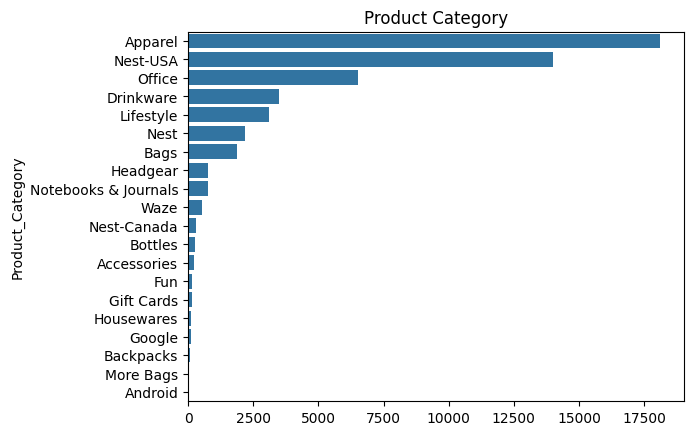

In [221]:
# 고객들은 어떤 제품을 가장 많이 거래할까?
# 해당 이커머스에서는 Apparel을 가장 많이 거래하는 경향 2위는 Nest-USA인데.. Nest-USA가 의미하는 게 뭔지 모르겠다.
import seaborn as sns
import matplotlib.pyplot as plt

temp = df['Product_Category'].value_counts().sort_values(ascending=False)
sns.barplot(y=temp.index, x=temp.values)
plt.title('Product Category')
plt.show()

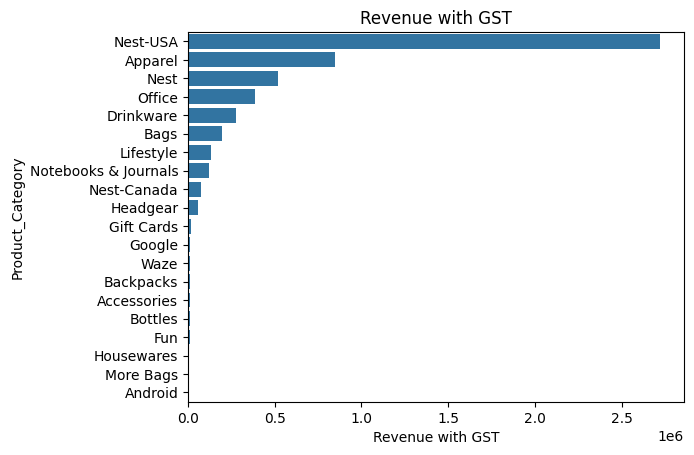

In [222]:
# 해당 이커머스에서 고객들이 가장 많이 구매한 카테고리의 구매액은 어떨까?
# 해당 이커머스에서는 Nest-USA, Apparel, Nest, Office 순으로 제품의 구매액이 나타났다.
temp = df.groupby('Product_Category')['Revenue with GST'].sum().reset_index().sort_values(by='Revenue with GST', ascending=False)
sns.barplot(y=temp['Product_Category'], x=temp['Revenue with GST'])
plt.title('Revenue with GST')
plt.show()

# RFM 기준 잡기

In [223]:
# 구매 주기를 계산해본다.
df = df.sort_values(by=['CustomerID','Transaction_Date'])
df['Purchase_Gap'] = df.groupby('CustomerID')['Transaction_Date'].diff().dt.days
customer_purchase_cycle = df.groupby('CustomerID')['Purchase_Gap'].mean().reset_index()
customer_purchase_cycle.rename(columns={'Purchase_Gap': 'Avg_Purchase_Cycle'}, inplace=True)
df = df.merge(customer_purchase_cycle, on='CustomerID', how='left')

In [224]:
# Purchase_Gap을 없애준다.
df.drop(columns=['Purchase_Gap'], inplace=True)

In [257]:
# 다른 카테고리의 제품을 사는 사람들이 Apparel, Nest-USA 제품을 담는 상관관계가 존재할까?
# 고객 아이디 별 Apparel, nest-usa 제품 구매 카운트와 그 제품이 아닌 다른 제품을 구매한 카운트를 셈

# 1. NON_AN_Count (Apparel, Nest-USA가 아닌 상품 개수)
non_an_counts = df[~df['Product_Category'].isin(['Apparel', 'Nest-USA'])].groupby('CustomerID')['Product_Category'].count()
df['NON_AN_Count'] = df['CustomerID'].map(non_an_counts).fillna(0).astype(int)

# 2. AN_Count (Apparel, Nest-USA 상품 개수)
an_counts = df[df['Product_Category'].isin(['Apparel', 'Nest-USA'])].groupby('CustomerID')['Product_Category'].count()
df['AN_Count'] = df['CustomerID'].map(an_counts).fillna(0).astype(int)

print(df)

       CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           12346           38223       2019-09-15  GGOEAAAJ080816   
1           12346           38223       2019-09-15  GGOEGOAR013099   
2           12347           23979       2019-03-24  GGOEGOAQ020099   
3           12347           23979       2019-03-24  GGOEGOCT019199   
4           12347           23980       2019-03-24  GGOENEBJ079499   
...           ...             ...              ...             ...   
52919       18283           40289       2019-10-10  GGOEGHPB071610   
52920       18283           40290       2019-10-10  GGOEAAEJ030916   
52921       18283           40290       2019-10-10  GGOEGAEB027814   
52922       18283           40291       2019-10-10  GGOEGAAH034015   
52923       18283           40291       2019-10-10  GGOEGALQ036615   

                                     Product_Description Product_Category  \
0       Android Men's Engineer Short Sleeve Tee Charcoal          Apparel   
1    

In [261]:
count_temp = df.drop_duplicates(subset=['CustomerID'])

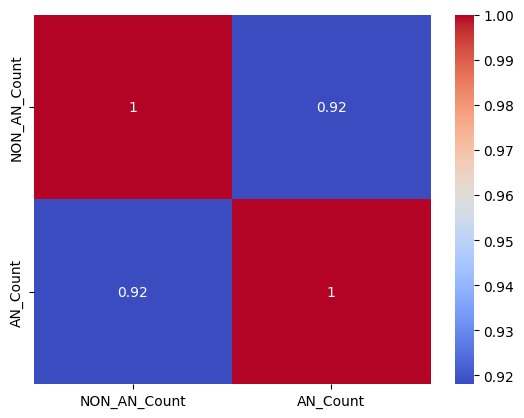

In [262]:
# 상관관계가 0.92로 매우 높게 나타났다. (즉, Apparel, Nest-USA 제품을 구입하는 개수와 Apparel, Nest-USA 제품을 구입하지 않는 개수의 상관계수가 0.92로 나타난다는 것)

sns.heatmap(count_temp[['NON_AN_Count', 'AN_Count']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [264]:
# p-value가 0.05 이하로 인과관계가 있다는 것을 입증
# 특히 회귀계수에서 non_an_count가 1이 증가할 떄, an_count가 1.4 증가한다는 것을 입증.

import statsmodels.api as sm

df['Total_Purchases'] = df['AN_Count'] + df['NON_AN_Count']
X = df[['NON_AN_Count']]
y = df['AN_Count']

# 상수 추가 (절편)
X = sm.add_constant(X)

# 회귀 분석 실행
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AN_Count   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 7.126e+05
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:14:19   Log-Likelihood:            -2.3758e+05
No. Observations:               52924   AIC:                         4.752e+05
Df Residuals:                   52922   BIC:                         4.752e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5006      0.119     29.529   

**RFM 분석의 목표는 무엇일까..?**

R,F,M 분석 목표

1. R의 계층화 목표 (최근에 방문한 고객)
    *  이커머스 사이트 이탈 방지를 위한 메세지 마케팅 수단을 위함이다.
    *  따라서 방문주기인 Recency를 평균을 기준으로 R Score을 정해본다.

2. F의 계층화 목표 (자주 방문하는 고객)
    *   해당 이커머스에 주 방문하는 목적이 Apparel + Nest-USA 제품 때문이다. 또한, Apparel, Nest-USA 제품의 구매 금액의 합이 가장 높게 나타났다.
    *  해당 이커머스는 고객 구매 금액을 늘리기 위해  Apparel + Nest-USA 제품을 구매하지 않는 고객들에게 전자 제품을 추천하도록 하고 싶다.
    *   따라서 Apparel, Nest-USA를 제외한 제품을 구매하는 사용자들의 구매주기를 기준으로 계층화한다음, F Score을 정한다.

3. M의 계층화 목표
    *   전체 매출액의 대부분을 차지하는 특정 고객층, 중간 고객층, 가장 낮은 구매층을 구분하는 것을 기준으로 한다.



따라서, Apparel, Nest-USA 제품을 사지 않은 고객들을 대상으로 Apparel, Nest-USA 제품을 추천하도록 마케팅하는 데 도움을 주기 위해 RFM 대시보드를 제작한다.

In [225]:
# 데이터 카피
rfm_data = df.copy()

In [226]:
# rfm_data에서 CustomerID를 기준으로 중복 제거
rfm_data = rfm_data.drop_duplicates(subset=['CustomerID'])
rfm_data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,year,Month,Coupon_Code,Discount_pct,Revenue with GST,Recency,Frequency,Monetary,Avg_Purchase_Cycle
0,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,...,0.18,2019,Sep,SALE30,30.0,78.46174,107.000000,2,144.68174,0.000000
2,12347,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,...,0.10,2019,Mar,OFF30,30.0,19.14000,174.283333,60,15713.95446,3.779661
62,12348,31048,2019-06-22,GGOEGDHQ015399,26 oz Double Wall Insulated Bottle,Drinkware,10,24.99,6.00,Used,...,0.18,2019,Jun,EXTRA30,30.0,211.37340,160.956522,23,1696.07606,5.409091
85,12350,46870,2019-12-14,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Not Used,...,0.10,2019,Dec,ELEC30,30.0,174.21800,17.000000,17,1469.40278,0.000000
102,12356,38208,2019-09-15,GGOEYAAQ031717,YouTube Men's Short Sleeve Hero Tee White,Apparel,1,11.89,6.00,Used,...,0.18,2019,Sep,SALE30,30.0,14.77714,107.000000,36,2068.03200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52766,18259,24877,2019-04-05,GGOEGOCL077699,Google Hard Cover Journal,Notebooks & Journals,30,11.99,28.69,Clicked,...,0.05,2019,Apr,NJ10,10.0,407.80950,270.000000,7,886.11306,0.000000
52773,18260,31013,2019-06-22,GGOEGOXQ016399,Badge Holder,Office,5,1.99,12.99,Clicked,...,0.10,2019,Jun,OFF30,30.0,25.23400,151.625000,40,3019.48836,2.692308
52813,18269,24883,2019-04-05,GGOEAAAB034817,Android BTTF Cosmos Graphic Tee,Apparel,1,15.99,6.50,Not Used,...,0.18,2019,Apr,SALE10,10.0,26.53820,260.500000,8,173.40850,10.857143
52821,18277,41388,2019-10-23,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2,149.00,6.00,Not Used,...,0.10,2019,Oct,ELEC10,10.0,334.40000,69.000000,1,334.40000,NaN


In [227]:
# 데이터 분포 확인
rfm_data.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,GST,year,Discount_pct,Revenue with GST,Recency,Frequency,Monetary,Avg_Purchase_Cycle
count,1468.000000,1468.000000,1468,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.0,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1402.000000
mean,15314.386240,29867.264305,2019-06-05 08:22:14.059945472,4.538828,51.007384,10.681431,25.912125,0.138202,2019.0,19.393733,100.196044,176.963011,36.051771,3701.474869,3.039102
min,12346.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.410000,0.000000,2.000000,0.050000,2019.0,0.000000,4.603500,0.000000,1.000000,6.930000,0.000000
25%,13830.500000,22651.250000,2019-03-11 18:00:00,1.000000,5.990000,6.000000,14.000000,0.100000,2019.0,10.000000,21.753150,108.866071,10.000000,798.664200,0.000000
50%,15300.000000,28693.500000,2019-05-23 00:00:00,1.000000,17.760000,6.500000,26.000000,0.180000,2019.0,20.000000,50.837940,175.146520,21.000000,2032.456290,0.018350
75%,16882.250000,36584.500000,2019-08-25 00:00:00,2.000000,99.000000,6.500000,38.000000,0.180000,2019.0,30.000000,137.500000,248.000000,46.000000,4520.503630,2.876007
max,18283.000000,48496.000000,2019-12-31 00:00:00,240.000000,355.740000,324.000000,50.000000,0.180000,2019.0,30.000000,2028.278400,364.000000,695.000000,87770.393680,172.000000
std,1744.000367,8880.078407,NaN,13.936774,61.670392,18.484444,13.959667,0.044764,0.0,8.649835,138.286636,93.081980,50.885680,5883.998301,10.301443


Recency에 해당하는 지표의 경우 중위값이 222, 25%가 128, 75% 294

Frequency에 해당하는 지표의 경우 중위값이 10, 25%가 21, 75%가 46

Moneatry에 해당하는 지표의 경우 중위값이 2032, 25%가 798, 75%가 4520

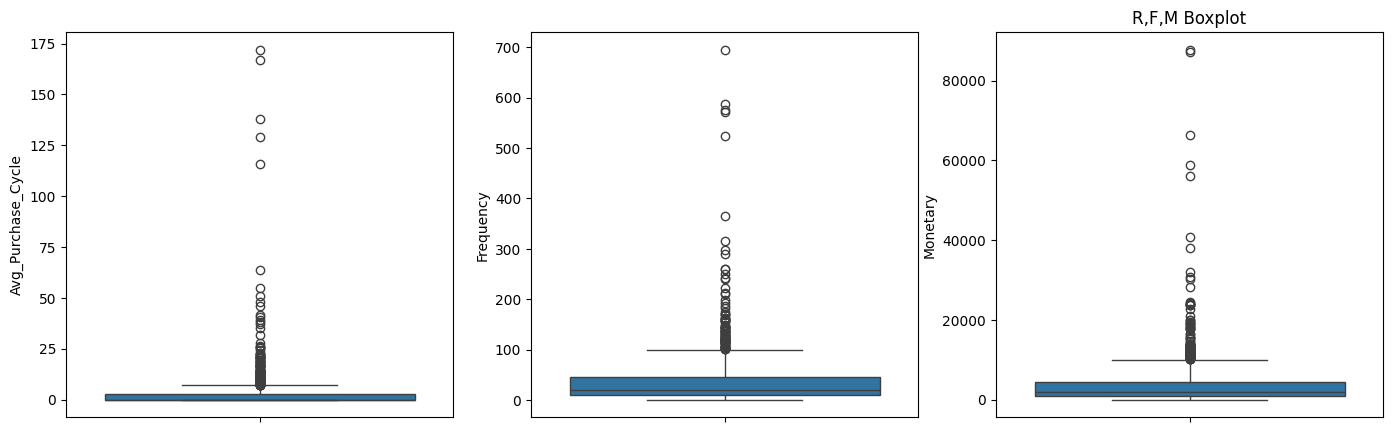

In [228]:
#R,F,M의 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,3,figsize=(17,5))
plt.title('R,F,M Boxplot')
sns.boxplot(rfm_data['Avg_Purchase_Cycle'], ax=axs[0])
sns.boxplot(rfm_data['Frequency'], ax=axs[1])
sns.boxplot(rfm_data['Monetary'], ax=axs[2])
plt.show()

<Axes: >

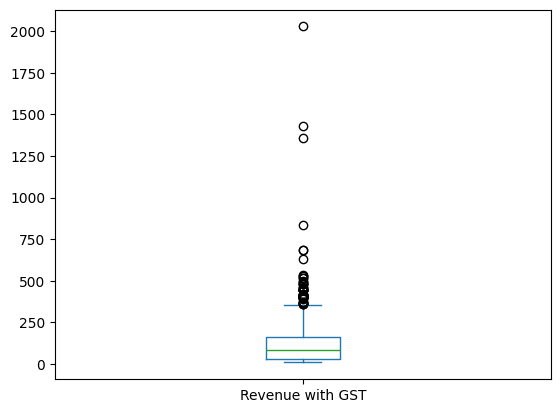

In [229]:
# 옷과 nest 머시기 제품을 구매하지 사람들
# 해당 데이터를 기준으로 4가지 기준으로 분류
df[(df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel')].drop_duplicates(subset=['CustomerID'])['Revenue with GST'].plot(kind='box')

In [230]:
# 옷과 nest 제품을 구매하지 않는 사람들 필터링
# 해당 데이터를 기준으로 4가지 기준으로 분류
df[~((df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel'))].drop_duplicates('CustomerID').groupby('CustomerID')['Avg_Purchase_Cycle'].mean().reset_index().describe()

,CustomerID,Avg_Purchase_Cycle
count,1342.000000,1317.000000
mean,15303.059613,2.724493
std,1751.541789,7.991599
min,12346.000000,0.000000
25%,13800.500000,0.000000
50%,15290.500000,0.025641
75%,16874.500000,2.928571
max,18283.000000,167.000000


In [231]:
df[~((df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel'))].drop_duplicates('CustomerID').groupby('CustomerID')['Recency'].mean().reset_index().describe()

,CustomerID,Recency
count,1342.000000,1342.000000
mean,15303.059613,175.152690
std,1751.541789,91.881617
min,12346.000000,0.000000
25%,13800.500000,108.000000
50%,15290.500000,172.000000
75%,16874.500000,243.485294
max,18283.000000,364.000000


In [232]:
df[~((df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel'))].drop_duplicates('CustomerID').groupby('CustomerID')['Revenue with GST'].sum().reset_index().describe()

,CustomerID,Revenue with GST
count,1342.000000,1342.000000
mean,15303.059613,85.453946
std,1751.541789,140.930166
min,12346.000000,4.603500
25%,13800.500000,14.478600
50%,15290.500000,27.735500
75%,16874.500000,98.395000
max,18283.000000,1307.176500


In [234]:
# 옷과 nest 머시기 제품을 구매하지 사람들
# 해당 데이터를 기준으로 4가지 기준으로 분류
df[~((df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel'))].groupby('CustomerID')['Recency'].count().reset_index().describe()

,CustomerID,Recency
count,1342.000000,1342.000000
mean,15303.059613,15.488077
std,1751.541789,21.535835
min,12346.000000,1.000000
25%,13800.500000,4.000000
50%,15290.500000,9.000000
75%,16874.500000,19.000000
max,18283.000000,270.000000


In [235]:
# 옷과 nest 머시기 제품을 구매하지 사람들
# 해당 데이터를 기준으로 4가지 기준으로 분류
df[~((df['Product_Category']=='Nest-USA') | (df['Product_Category']=='Apparel'))].drop_duplicates(subset=['CustomerID'])['Revenue with GST'].describe()

,Revenue with GST
count,1342.000000
mean,85.453946
std,140.930166
min,4.603500
25%,14.478600
50%,27.735500
75%,98.395000
max,1307.176500


In [236]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,year,Month,Coupon_Code,Discount_pct,Revenue with GST,Recency,Frequency,Monetary,Avg_Purchase_Cycle
0,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,...,0.18,2019,Sep,SALE30,30.0,78.46174,107.000000,2,144.68174,0.000000
1,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,...,0.10,2019,Sep,OFF30,30.0,66.22000,107.000000,2,144.68174,0.000000
2,12347,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,...,0.10,2019,Mar,OFF30,30.0,19.14000,174.283333,60,15713.95446,3.779661
3,12347,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,...,0.10,2019,Mar,OFF30,30.0,18.78800,174.283333,60,15713.95446,3.779661
4,12347,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,...,0.10,2019,Mar,ELEC30,30.0,119.73500,174.283333,60,15713.95446,3.779661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,18283,40289,2019-10-10,GGOEGHPB071610,Google Twill Cap,Apparel,1,8.79,6.50,Used,...,0.18,2019,Oct,SALE10,10.0,16.23798,122.794118,102,7437.95877,0.722772
52920,18283,40290,2019-10-10,GGOEAAEJ030916,Android Women's Long Sleeve Blended Cardigan Grey,Apparel,1,15.00,6.00,Used,...,0.18,2019,Oct,SALE10,10.0,22.30200,122.794118,102,7437.95877,0.722772
52921,18283,40290,2019-10-10,GGOEGAEB027814,Google Women's Short Sleeve Hero Tee Black,Apparel,2,16.99,6.00,Used,...,0.18,2019,Oct,SALE10,10.0,42.45876,122.794118,102,7437.95877,0.722772
52922,18283,40291,2019-10-10,GGOEGAAH034015,Google Men's Vintage Badge Tee Sage,Apparel,1,4.56,26.43,Clicked,...,0.18,2019,Oct,SALE10,10.0,36.56820,122.794118,102,7437.95877,0.722772


In [237]:
# 4개 집단으로 나눈다. (Boxplot을 기준으로 4개 집단으로 나눈다.)
# 그리고 각각 Apparel, Nest를 구매하지 않은 고객

def rscore(x):
    if x<=108:
        return 4
    elif x<=175:
        return 3
    elif x<=248:
        return 2
    else:
        return 1

def fscore(x):
    if x<=12:
        return 1
    elif x<=24:
        return 2
    elif x<=49:
        return 3
    else:
        return 4


def mscore(x):
    if x<=14:
        return 1
    elif x<=27:
        return 2
    elif x<=98:
        return 3
    else:
        return 4

In [238]:
rfm_data
rfm_data['R_Score'] = rfm_data.groupby('CustomerID')['Recency'].transform(lambda x: x.apply(rscore))
rfm_data['F_Score'] = rfm_data.groupby('CustomerID')['Frequency'].transform(lambda x: x.apply(fscore))
rfm_data['M_Score'] = rfm_data.groupby('CustomerID')['Revenue with GST'].transform(lambda x: x.apply(mscore))

In [239]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,year,Month,Coupon_Code,Discount_pct,Revenue with GST,Recency,Frequency,Monetary,Avg_Purchase_Cycle
0,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,...,0.18,2019,Sep,SALE30,30.0,78.46174,107.000000,2,144.68174,0.000000
1,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,...,0.10,2019,Sep,OFF30,30.0,66.22000,107.000000,2,144.68174,0.000000
2,12347,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,...,0.10,2019,Mar,OFF30,30.0,19.14000,174.283333,60,15713.95446,3.779661
3,12347,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,...,0.10,2019,Mar,OFF30,30.0,18.78800,174.283333,60,15713.95446,3.779661
4,12347,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,...,0.10,2019,Mar,ELEC30,30.0,119.73500,174.283333,60,15713.95446,3.779661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,18283,40289,2019-10-10,GGOEGHPB071610,Google Twill Cap,Apparel,1,8.79,6.50,Used,...,0.18,2019,Oct,SALE10,10.0,16.23798,122.794118,102,7437.95877,0.722772
52920,18283,40290,2019-10-10,GGOEAAEJ030916,Android Women's Long Sleeve Blended Cardigan Grey,Apparel,1,15.00,6.00,Used,...,0.18,2019,Oct,SALE10,10.0,22.30200,122.794118,102,7437.95877,0.722772
52921,18283,40290,2019-10-10,GGOEGAEB027814,Google Women's Short Sleeve Hero Tee Black,Apparel,2,16.99,6.00,Used,...,0.18,2019,Oct,SALE10,10.0,42.45876,122.794118,102,7437.95877,0.722772
52922,18283,40291,2019-10-10,GGOEGAAH034015,Google Men's Vintage Badge Tee Sage,Apparel,1,4.56,26.43,Clicked,...,0.18,2019,Oct,SALE10,10.0,36.56820,122.794118,102,7437.95877,0.722772


In [240]:
rfm = pd.merge(df,rfm_data[['CustomerID','R_Score','F_Score','M_Score']], on='CustomerID', how='left')

In [241]:
# Customer 점수 계산
rfm['Customer_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [242]:
# 고객 Segment
rfm['Customer_Segment_Score'] = rfm['F_Score'] + rfm['M_Score']

In [243]:
# 고객 Segment 함수
# (8,7), (6,5), (4,3), 2
def segmentation(x):
    if x == 8:
        return '최고 고객'
    elif x == 7:
        return '충성 고객'
    elif x == 6:
        return '충성 고객'
    elif x == 5:
        return '잠재 고객'
    elif x == 4:
        return '잠재 고객'
    elif x == 3:
        return '일시적 고객'
    elif x == 2:
        return '일시적 고객'

rfm['Customer_Segment'] = rfm['Customer_Segment_Score'].apply(segmentation)

In [244]:
# 방문 빈도 Segment 함수

def segmentatiton2(x):
    if x == 4:
        return '110일 이내 접속 고객'
    elif x == 3:
        return '170일 이내 접속 고객'
    elif x == 2:
        return '250일 이내 접속 고객'
    elif x == 1:
        return '251일 이상 접속하지 않음'

rfm['Recency_Segment'] = rfm['R_Score'].apply(segmentatiton2)

In [245]:
rfm.to_csv('sales_datalog2.csv')

In [246]:
rfm

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Frequency,Monetary,Avg_Purchase_Cycle,R_Score,F_Score,M_Score,Customer_Score,Customer_Segment_Score,Customer_Segment,Recency_Segment
0,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,...,2,144.68174,0.000000,4,1,3,8,4,잠재 고객,110일 이내 접속 고객
1,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,...,2,144.68174,0.000000,4,1,3,8,4,잠재 고객,110일 이내 접속 고객
2,12347,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,...,60,15713.95446,3.779661,3,4,2,9,6,충성 고객,170일 이내 접속 고객
3,12347,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,...,60,15713.95446,3.779661,3,4,2,9,6,충성 고객,170일 이내 접속 고객
4,12347,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,...,60,15713.95446,3.779661,3,4,2,9,6,충성 고객,170일 이내 접속 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,18283,40289,2019-10-10,GGOEGHPB071610,Google Twill Cap,Apparel,1,8.79,6.50,Used,...,102,7437.95877,0.722772,3,4,2,9,6,충성 고객,170일 이내 접속 고객
52920,18283,40290,2019-10-10,GGOEAAEJ030916,Android Women's Long Sleeve Blended Cardigan Grey,Apparel,1,15.00,6.00,Used,...,102,7437.95877,0.722772,3,4,2,9,6,충성 고객,170일 이내 접속 고객
52921,18283,40290,2019-10-10,GGOEGAEB027814,Google Women's Short Sleeve Hero Tee Black,Apparel,2,16.99,6.00,Used,...,102,7437.95877,0.722772,3,4,2,9,6,충성 고객,170일 이내 접속 고객
52922,18283,40291,2019-10-10,GGOEGAAH034015,Google Men's Vintage Badge Tee Sage,Apparel,1,4.56,26.43,Clicked,...,102,7437.95877,0.722772,3,4,2,9,6,충성 고객,170일 이내 접속 고객


In [247]:
rfm['Customer_Segment'].unique()

array(['잠재 고객', '충성 고객', '최고 고객', '일시적 고객'], dtype=object)